In [1]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Load dataset
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
inputdata = './Heart Data/heart.csv'
dataset = pandas.read_csv(inputdata, names=names)

In [3]:
dataset.shape

(303, 14)

In [4]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
ranges = [0,10,20,30,40,50,60,70,80,90,100] 
dataset['age'].groupby([(pandas.cut(dataset.age, ranges))]).count()

age
(0, 10]        0
(10, 20]       0
(20, 30]       1
(30, 40]      18
(40, 50]      76
(50, 60]     129
(60, 70]      73
(70, 80]       6
(80, 90]       0
(90, 100]      0
Name: age, dtype: int64

In [8]:
# Convert the dataset into array
array = dataset.values

# Create two (sub) arrays from it
X = array[:,0:13] # data without class
Y = array[:,13]   # just class

In [9]:
test_size = 0.2
seed = 2
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)


In [10]:
#Set kernel coefficient
model = svm.SVC(kernel='linear', C=5, gamma='scale')

In [11]:
model.fit(X_train, Y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
model.score(X_test, Y_test)

0.8688524590163934

In [13]:
my_set = ([[45, 0, 1, 110, 150, 0, 1, 110, 0, 0.0, 1, 0, 0]])
prediction = model.predict(my_set)
prediction

array([1.])

In [14]:
Y_predicted = model.predict(X_test)
cmat = confusion_matrix(Y_test, Y_predicted)

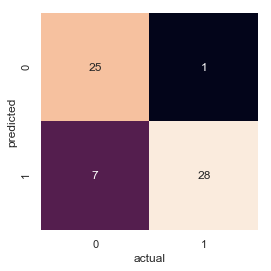

In [15]:
sns.set()
sns.heatmap(cmat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('actual')
plt.ylabel('predicted');
plt.show()

In [22]:
pickle_out = open("./Heart Data/model_pickle","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [23]:
pickle_in = open("C:\\Users\mikke\Desktop\Skole\Python\Materiale\Data\Heart Data\model_pickle","rb")
loaded_model = pickle.load(pickle_in)

In [24]:
loaded_model.predict(my_set)

array([1.])